<a href="https://colab.research.google.com/github/YouAzo96/DeepLearning/blob/main/fastai_custom_dataset_chimp_gorilla_using_datablocks_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('content/', force_remount = True)

Mounted at content/


In [ ]:
root_dir = 'content/My Drive/'
#!ls "$root_dir"

In [ ]:
# import error solution: https://forums.fast.ai/t/import-fastbook-failing-module-fastai-callback-all-not-found/78565/23 

In [ ]:
import fastai
print(fastai.__version__)

2.5.6


In [ ]:
# !pip install -Uqq fastbook
!pip install fastbook --upgrade

     |████████████████████████████████| 720 kB 4.2 MB/s 
     |████████████████████████████████| 188 kB 46.2 MB/s 
     |████████████████████████████████| 49 kB 4.9 MB/s 
     |████████████████████████████████| 1.2 MB 43.0 MB/s 
     |████████████████████████████████| 56 kB 4.0 MB/s 
     |████████████████████████████████| 561 kB 46.3 MB/s 
     |████████████████████████████████| 51 kB 287 kB/s 
     |████████████████████████████████| 130 kB 49.2 MB/s 
     |████████████████████████████████| 428 kB 48.1 MB/s 
  Attempting uninstall: tornado
    Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 5.3.5
    Uninstalling jupyter-client-5.3.5:
      Successfully uninstalled jupyter-client-5.3.5
  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstall

In [ ]:
import fastai
fastai.__version__

'2.5.6'

In [ ]:
from fastai.vision.all import *



In [ ]:
#!ls "$root_dir"

In [ ]:
path = Path(root_dir+'CSC451SP22_datasets/Cal256_26')
path.ls()

(#26) [Path('content/My Drive/CSC451SP22_datasets/Cal256_26/250.zebra'),Path('content/My Drive/CSC451SP22_datasets/Cal256_26/scorpion'),Path('content/My Drive/CSC451SP22_datasets/Cal256_26/goat'),Path('content/My Drive/CSC451SP22_datasets/Cal256_26/213.teddy-bear'),Path('content/My Drive/CSC451SP22_datasets/Cal256_26/207.swan'),Path('content/My Drive/CSC451SP22_datasets/Cal256_26/158.penguin'),Path('content/My Drive/CSC451SP22_datasets/Cal256_26/190.snake'),Path('content/My Drive/CSC451SP22_datasets/Cal256_26/164.porcupine'),Path('content/My Drive/CSC451SP22_datasets/Cal256_26/201.starfish-101'),Path('content/My Drive/CSC451SP22_datasets/Cal256_26/189.snail')...]

In [ ]:
files = get_image_files(path)
len(files)

322

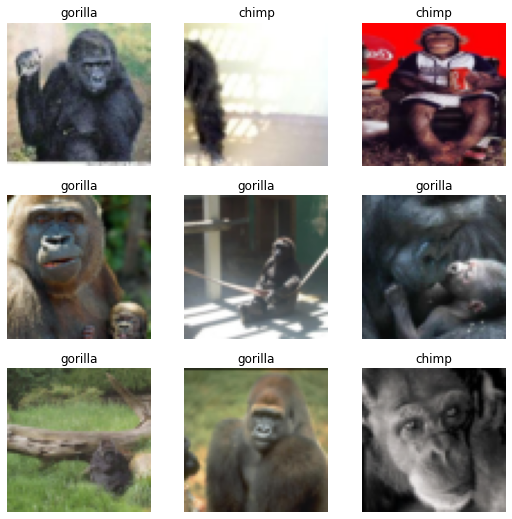

In [ ]:

chimp_gorillas = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=lambda x: parent_label(x).split('.')[-1],
    item_tfms=Resize(64))


dls = chimp_gorillas.dataloaders(path)

# dls = ImageDataLoaders.from_name_func(
#     path, get_image_files(path), valid_pct=0.2, seed=42,
#     label_func=data_label, item_tfms=Resize(224))

dls.show_batch()

In [ ]:
from torchvision.models.vgg import vgg19
#Learners: 
#AlexNet: 
alexN = cnn_learner(dls, alexnet, metrics=accuracy)
#VGG-19
vggN = cnn_learner(dls,vgg19,metrics=accuracy)

#custom:

net_seq = nn.Sequential(
    nn.Conv2d( 3, 6, 5) ,
    nn.MaxPool2d( 2, 2),
    nn.ReLU(),
    nn.Flatten(),
    nn.Linear(6 * 30* 30, 64),
    nn.ReLU(),
    nn.Linear(64, 2)
)


import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) 
        self.pool = nn.MaxPool2d( 2, 2)
        self.fc1 = nn.Linear(6 * 30* 30, 64)
        self.fc2 = nn.Linear(64, 2)

    def forward(self, x, **kwargs):
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(-1, 6 * 30 * 30)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        
        return x


net = Net()


In [ ]:
#learn = cnn_learner(dls, net, metrics=error_rate)
learn = Learner(dls, net_seq, metrics=error_rate)


learn.fit(5, 0.001,cbs=[ShowGraphCallback()])
learn.fit(5, 0.01,cbs=[ShowGraphCallback()])

NameError: ignored

Sequential(
  (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (2): ReLU()
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): ReLU()
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=2704, out_features=64, bias=True)
  (8): ReLU()
  (9): Linear(in_features=64, out_features=2, bias=True)
)


epoch,train_loss,valid_loss,error_rate,time
0,0.660619,0.593076,0.281250,00:02
1,0.660154,0.608394,0.281250,00:02
2,0.654684,0.600032,0.281250,00:02
3,0.650503,0.570962,0.281250,00:02
4,0.644847,0.598298,0.218750,00:02


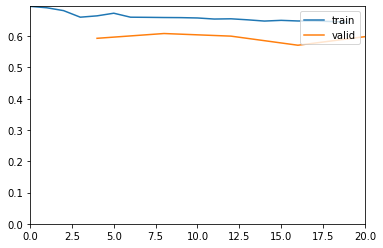

epoch,train_loss,valid_loss,error_rate,time
0,0.862927,0.674625,0.406250,00:02
1,0.781823,0.692850,0.531250,00:02
2,0.751623,0.688860,0.265625,00:02
3,0.733517,0.674179,0.265625,00:02
4,0.721019,0.654915,0.250000,00:02


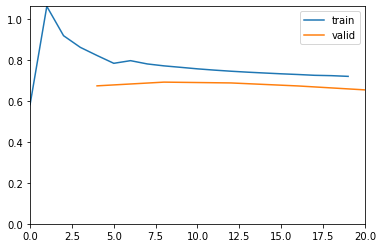

In [ ]:
net_seq2 = nn.Sequential(
    nn.Conv2d( 3, 6, 5) ,
    nn.MaxPool2d( 2, 2),
    nn.ReLU(),
    nn.Conv2d( 6, 16, 5) ,
    nn.MaxPool2d( 2, 2),
    nn.ReLU(),
    nn.Flatten(),
    nn.Linear(16 * 13* 13, 64),
    nn.ReLU(),
    nn.Linear(64, 2)
)

print(net_seq2)

learn = Learner(dls, net_seq2, metrics=error_rate)


learn.fit(5, 0.001,cbs=[ShowGraphCallback()])
learn.fit(5, 0.01,cbs=[ShowGraphCallback()])


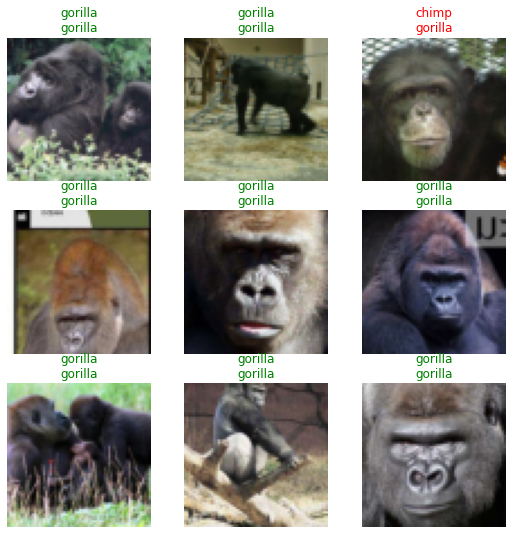

In [ ]:
learn.show_results()

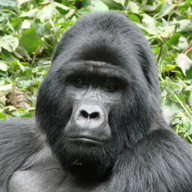

In [ ]:
img = PILImage.create(f'{root_dir}/Spring_2022/CSC451-01/Colab_Notebooks/CNNs/data/test_images/mountain-gorilla_thumb.jpg')
img.to_thumb(192)



In [ ]:
is_chimp,_,probs = learn.predict(img)
print(f"Is this a chimp?: {is_chimp}.")
print(f"Probability it's a chimp: {probs[0].item():.6f}")

Is this a chimp?: gorilla.
Probability it's a chimp: 0.458906


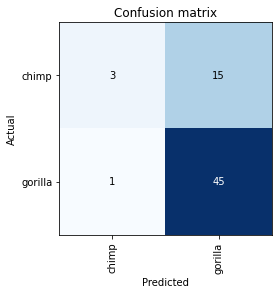

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
correct_count = 0
num_ex = len(learn.dls.valid_ds)

for valid_ex in learn.dls.valid_ds:
  gt = valid_ex[1]
  label, label_idx, probs = learn.predict(valid_ex[0]) # get_preds for batches
  correct_count+=(gt.item() == label_idx)

print(correct_count.item())
print(f'accuracy:{correct_count.item()/num_ex}')

48
accuracy:0.75


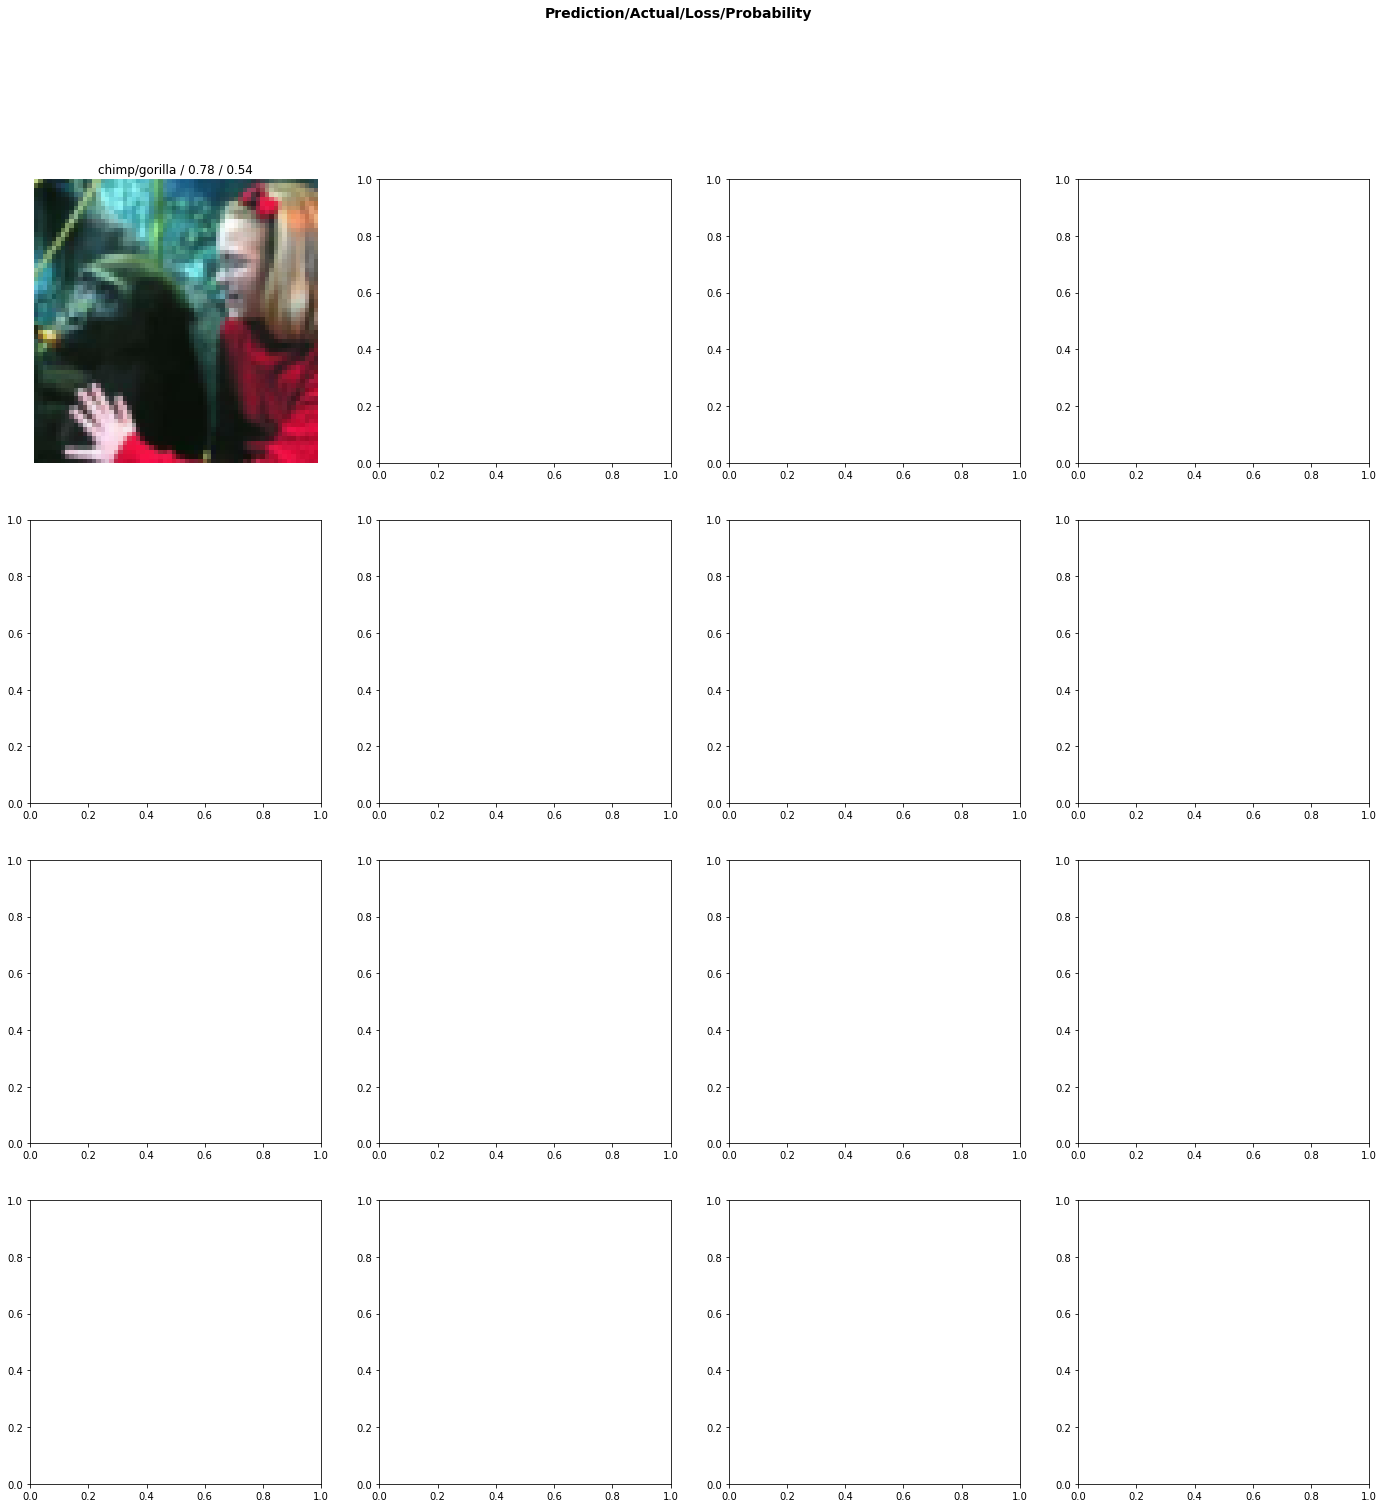

In [ ]:
# interp.plot_top_losses(k = 16, figsize=(24,24))